#Importing the required libraries

In [120]:
pwd

'/home/wsuser/work'

In [121]:
!pip install keras==2.2.4

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.


In [122]:
!pip install tensorflow

  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [123]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutiona l Layer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt

#load dataset

In [124]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

In [125]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [126]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

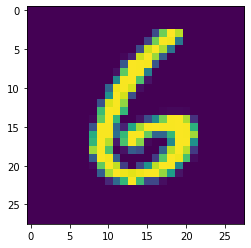

In [127]:
plt.imshow(x_train[6000])

In [128]:
np.argmax(y_train[6000])

0

#Reshaping Dataset

In [129]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

#Applying One Hot Encoding

In [130]:
number_of_classes = 10 

In [131]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

#Add CNN Layers

In [132]:
model=Sequential ()

In [133]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [134]:
model.add(Flatten())

In [135]:
model.add(Dense(number_of_classes,activation = 'softmax'))

#Compiling the model

In [136]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [137]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

#Train the model

In [139]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.2503 - accuracy: 0.9507 - val_loss: 0.0872 - val_accuracy: 0.9721
Epoch 2/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0698 - accuracy: 0.9786 - val_loss: 0.0802 - val_accuracy: 0.9759
Epoch 3/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0795 - val_accuracy: 0.9777
Epoch 4/5
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0902 - val_accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0925 - val_accuracy: 0.9771


#Observing the metrics

In [141]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09250272810459137, 0.9771000146865845]


In [142]:
model.save('models/Digits.h5')

In [143]:
#saving in tar
!tar -zcvf digit-recognition.tgz Digits.h5

tar: Digits.h5: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors


In [144]:
ls

digit.pkl              IBM_.model.tar.gb  image-classification-model_new.tgz
digit-recognition.tgz  IBM__model.tar.gb  models/
IBM.model.tar.gb       IBM_model.tar.gb


#IBM Deployment

In [145]:
!pip install watson-machine-learning-client

In [146]:
!pip install ibm_watson_machine_learning

In [147]:
from ibm_watson_machine_learning import APIClient

wml_credentials={
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"pDXXVs3a3uhZDSOhBb2tCKqNg5xRKV_7OLIAjx4yPIIj"
}
client = APIClient(wml_credentials)
client

In [148]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/5d9dbcc374654734a984015765690e62:0437af44-3dda-4c01-9299-6a0ac59bcc58::',
      'guid': '0437af44-3dda-4c01-9299-6a0ac59bcc58',
      'name': 'Watson Machine Learning-bw',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'deploy',
    'scope': {'bss_account_id': '5d9dbcc374654734a984015765690e62'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '762e6f59-0e33-4805-925b-63eee6b14df7',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': '5f6508224c384fc99f737d70c9a24feb',
        'api_key': 'zmBYAzIlt6JO_65Up56ieQbUlZiEFdyj6QJ9ULz82EC6',
        'secret_access_key': '2029c01a20eac07a72dd44504d9c449d46a2c7f71ed0f44e',
        'service_id': 'ServiceId-5711592d-a323-43b0-884f-b6b4fe584afc'},
       'editor': {'access_key_id': '9c5b271513dd4a3fae8b27d3f8e89412',
        'api_key': 

In [149]:
def guid_space_name(client,deploy):
  space= client.spaces.get_details()
  return(next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [150]:
space_uid = guid_space_name(client,'deploy')
space_uid

'79caef59-a458-4201-add7-1763e1a6a341'

In [151]:
client.set.default_space(space_uid)

'SUCCESS'

In [152]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [153]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid 

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [154]:
model_details = client.repository.store_model(model='digit-recognition.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [155]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-20T16:24:50.224Z',
  'id': '7b8f0bc1-2fab-4fa6-8a48-20136014be0f',
  'modified_at': '2022-11-20T16:24:53.972Z',
  'name': 'CNN Model',
  'owner': 'IBMid-666002KI5I',
  'resource_key': '9cf48e58-9c72-41aa-8066-265ae6838105',
  'space_id': '79caef59-a458-4201-add7-1763e1a6a341'},
 'system': {'warnings': []}}

In [156]:
model_id = client.repository.get_model_id(model_details)
model_id

'7b8f0bc1-2fab-4fa6-8a48-20136014be0f'

In [159]:
client.repository.download(model_id,'IBM.-model.tar.gb')

Successfully saved model content to file: 'IBM.-model.tar.gb'


'/home/wsuser/work/IBM.-model.tar.gb'

In [160]:
DEPLOYMENT_NAME="Hand written Digit Recognition System"
DEMO_MODEL=model

In [161]:
model_details
model_id=client.repository.get_model_id(model_details)
dep_props={
 client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
 client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [162]:
deployment=client.deployments.create(artifact_uid=model_id,meta_props=dep_props)



#######################################################################################

Synchronous deployment creation for uid: '7b8f0bc1-2fab-4fa6-8a48-20136014be0f' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.
..

Deployment creation failed for deployment id: 8b1287ce-00be-4236-ae96-89c84301bb58. Errors: [{'code': 'invalid_model_archive', 'message': "The given model archive didn't contain any file saved in the supported file formats for tensorflow. Retry the deployment after saving in any one of the following supported file formats: ['.pb', '.h5', '.hdf5']", 'target': {'type': 'none', 'name': 'none'}, 'more_info': 'none'}]



failed

--------------------------
Deployment creation failed
--------------------------


The given model archive didn't contain any file saved in the supported file formats for tensorflow. Retry the deployment after saving in any one of the following supported file formats: ['.pb', '.h5', '.hdf5']


WMLClientError: Deployment creation failed for deployment id: 8b1287ce-00be-4236-ae96-89c84301bb58. Errors: [{'code': 'invalid_model_archive', 'message': "The given model archive didn't contain any file saved in the supported file formats for tensorflow. Retry the deployment after saving in any one of the following supported file formats: ['.pb', '.h5', '.hdf5']", 'target': {'type': 'none', 'name': 'none'}, 'more_info': 'none'}]